In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In [367]:
survey = pd.read_csv('./SBU_example_Surveydata_2014_2.csv')
print(survey.shape)
survey.head()

(6865, 120)


,STATE,GEOSTR,DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,...,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
0,New York,201,D,To be called,40136,28,April,4252014,4,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
1,New York,202,D,To be called,10105,17,January,3162014,3,16,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
2,New York,201,D,To be called,110014,4,November,11292014,November,29,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
3,New York,201,D,To be called,110083,6,November,11252014,November,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
4,New York,202,D,To be called,50129,7,May,10052014,October,5,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)


In [368]:
features = ['GENHLTH', 'PHYSHLTH', 'HLTHPLN1', 'EXERANY2', 'AGE', 'MARITAL', 'EDUCA', 'INCOME2',
            'SEX', 'USEEQUIP', 'DIFFWALK', 'PDIABTST', 'PREDIAB1', 'BMI5CAT', 'RFBMI5', 'CHLDCNT', 'DRNKANY5',
            'DRNKDY4', 'SSBSUGAR', 'SSBFRUT2', 'LIFECHG', 'DIABETE3']
data = survey[features]

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 22 columns):
GENHLTH     6865 non-null object
PHYSHLTH    6865 non-null object
HLTHPLN1    6865 non-null object
EXERANY2    6865 non-null object
AGE         6865 non-null object
MARITAL     6865 non-null object
EDUCA       6865 non-null object
INCOME2     6865 non-null object
SEX         6865 non-null object
USEEQUIP    6865 non-null object
DIFFWALK    6865 non-null object
PDIABTST    6865 non-null object
PREDIAB1    6865 non-null object
BMI5CAT     6865 non-null object
RFBMI5      6865 non-null object
CHLDCNT     6865 non-null object
DRNKANY5    6865 non-null object
DRNKDY4     6865 non-null object
SSBSUGAR    6865 non-null object
SSBFRUT2    6865 non-null object
LIFECHG     6865 non-null object
DIABETE3    6865 non-null object
dtypes: object(22)
memory usage: 1.2+ MB


In [370]:
data.head()

,GENHLTH,PHYSHLTH,HLTHPLN1,EXERANY2,AGE,MARITAL,EDUCA,INCOME2,SEX,USEEQUIP,...,PREDIAB1,BMI5CAT,RFBMI5,CHLDCNT,DRNKANY5,DRNKDY4,SSBSUGAR,SSBFRUT2,LIFECHG,DIABETE3
0,Very good,None,Yes,No,Age 65 or older,Divorced,College 1 year to 3 years (Some college or tec...,Don't know/Not sure,Male,No,...,Not asked or Missing,Overweight,Yes,One child in household,No,Did not drink,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
1,Very good,None,Yes,Yes,Age 65 or older,Divorced,College 4 years or more (College graduate),Less than $50000 ($35000 to less than $50000),Female,No,...,Not asked or Missing,Normal Weight,No,No children in household,No,Did not drink,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
2,Good,Number of days,Yes,Yes,Age 35 - 44,Married,College 4 years or more (College graduate),$75000 or more,Female,No,...,Not asked or Missing,Normal Weight,No,One child in household,Yes,Don't know/Not sure/Refused/Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
3,Very good,None,Yes,Yes,Age 65 or older,Married,College 4 years or more (College graduate),$75000 or more,Male,No,...,Not asked or Missing,Overweight,Yes,No children in household,Yes,Number of drinks per day,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
4,Excellent,None,Yes,Yes,Age 35 - 44,Married,College 4 years or more (College graduate),$75000 or more,Female,No,...,Not asked or Missing,Overweight,Yes,No children in household,No,Did not drink,Not asked or Missing,Not asked or Missing,Not asked or Missing,No


In [371]:
# factorize DIABETES into health_status
data = data[data.DIABETE3.isin(['No', 'Yes'])]
# cat = pd.Categorical(data.DIABETE3, categories=['No', 'Yes'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# print(unique)
# data['health_status'] = labels

# Process GENHLTH
data = data[data.GENHLTH.isin(['Very good', 'Good', 'Excelent', 'Fair', 'Poor'])]

# Process PHYSHLTH
data = data[data.PHYSHLTH.isin(['None', 'Number of days'])]
# cat = pd.Categorical(data.PHYSHLTH, categories=['None', 'Number of days'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['injury'] = labels

# Process HLTHPLN1
data = data[data.HLTHPLN1.isin(['No', 'Yes'])]
# cat = pd.Categorical(data.HLTHPLN1, categories=['No', 'Yes'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['health_coverage'] = labels

# Process EXERANY2
data = data[data.EXERANY2.isin(['No', 'Yes'])]
# cat = pd.Categorical(data.EXERANY2, categories=['No', 'Yes'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['physical_activities'] = labels

# Process Age
data = data[~data.AGE.isin(['Refused'])]

# Process MARITAL
data = data[~data.MARITAL.isin(['Refused', 'Not asked or Missing'])]
data.MARITAL[data.MARITAL == 'A member of an unmarried couple'] = 'Couple'

# Process EDUCA
def education_map(x):
    if x == 'College 4 years or more (College graduate)': return 'College graduate'
    elif x == 'Grade 12 or GED (High school graduate)': return 'High school graduate'
    elif x == 'College 1 year to 3 years (Some college or technical school)': return 'Some college or technical school'
    elif x == 'Grades 9 through 11 (Some high school)': return 'Some high school'
    elif x == 'Grades 1 through 8 (Elementary)': return 'Elementary'
    else: return 'No Education'

data = data[~data.EDUCA.isin(['Refused', 'Not asked or Missing'])]
data['EDUCA'] = data.EDUCA.apply(education_map)

# Process INCOME2
def income_map(x):
    if x == 'Less than $10000': return '0-10k'
    elif x == 'Less than $15000 ($10000 to less than $15000)': return '10k-15k'
    elif x == 'Less than $20000 ($15000 to less than $20000)': return '15k-20k'
    elif x == 'Less than $25000 ($20000 to less than $25000)': return '20k-25k'
    elif x == 'Less than $35000 ($25000 to less than $35000)': return '25k-35k'
    elif x == 'Less than $50000 ($35000 to less than $50000)': return '35k-50k'
    elif x == 'Less than $75000 ($50000 to less than $75000)': return '50k-75k'
    else: return '75k+'

data = data[~data.INCOME2.isin(['Refused', "Don't know/Not sure/Missing", 'Not asked or Missing'])]
data['INCOME2'] = data.INCOME2.apply(income_map)

# Process SEX
data = data[data.SEX.isin(['Female', 'Male'])]
# cat = pd.Categorical(data.SEX, categories=['Female', 'Male'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['SEX'] = labels

# Process USEEQUIP
data = data[data.USEEQUIP.isin(['No', 'Yes'])]
# cat = pd.Categorical(data.USEEQUIP, categories=['No', 'Yes'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['equipment'] = labels

# Process DIFFWALK
data = data[data.DIFFWALK.isin(['No', 'Yes'])]
# cat = pd.Categorical(data.DIFFWALK, categories=['No', 'Yes'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['walking'] = labels

# Process PDIABTST
data = data[data.PDIABTST.isin(['No', 'Yes', 'Not asked or Missing'])]

# Process PREDIAB1
data = data[data.PREDIAB1.isin(['No', 'Yes', 'Not asked or Missing'])]

# Process BMI5CAT
data = data[~data.BMI5CAT.isin(["Don't know/Refused/Missing"])]

# Process RFBMI5
data = data[~data.RFBMI5.isin(["Don't know/Refused/Missing"])]

# Process CHLDCNT
data = data[~data.CHLDCNT.isin(["Don't know/Not sure/Missing"])]

# Process DRNKANY5
data = data[data.DRNKANY5.isin(['No', 'Yes'])]
# cat = pd.Categorical(data.DRNKANY5, categories=['No', 'Yes'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['drink30'] = labels

# Process DRNKDY4
data['DRNKDY4'] = data.DRNKDY4.apply(lambda x: 'Did not drink' if x == 'Did not drink' else 'Number of drinks per day')
# cat = pd.Categorical(data.DRNKDY4, categories=['Did not drink', 'Number of drinks per day'], ordered=True)
# labels, unique = pd.factorize(cat, sort=True)
# data['drink_per_day'] = labels

# Process SSBSUGAR
data = data[~data.SSBSUGAR.isin(['Refused', "Don't know/Not sure"])]

# Process SSBFRUT2
data = data[~data.SSBFRUT2.isin(['Refused', "Don't know/Not sure"])]

# Process LIFECHG
data = data[~data.LIFECHG.isin(['Refused'])]

In [372]:
from sklearn.utils import resample

print('Original Class: ', data.DIABETE3.value_counts())

# Upsample minority class
data_upsampled = resample(data[data.DIABETE3 == 'Yes'], 
                                 replace=True,     # sample with replacement
                                 n_samples=2500,    # to match majority class
                                 random_state=123)

data_full = pd.concat([data])#, data_upsampled])
print('Sampled Class: ', data_full.DIABETE3.value_counts())

Original Class:  No     3407
Yes     639
Name: DIABETE3, dtype: int64
Sampled Class:  No     3407
Yes     639
Name: DIABETE3, dtype: int64


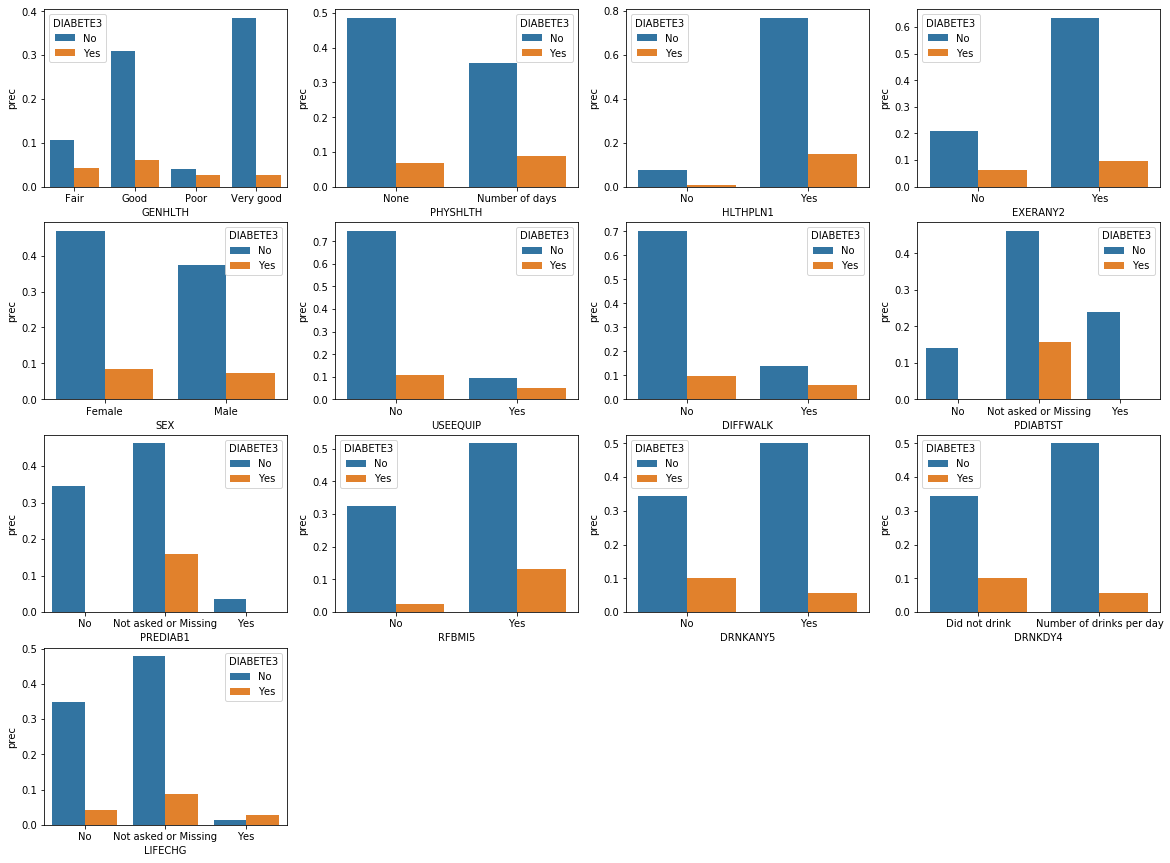

In [373]:
n = data_full.shape[0]
feature_plot = ['GENHLTH', 'PHYSHLTH', 'HLTHPLN1', 'EXERANY2', 'SEX',
                'USEEQUIP', 'DIFFWALK', 'PDIABTST', 'PREDIAB1', 'RFBMI5', 'DRNKANY5', 'DRNKDY4', 'LIFECHG']

plt.figure(figsize=(20,15))
for i in range(1, 14):
    plt.subplot(4, 4, i)
    temp = data_full.groupby([feature_plot[i-1], 'DIABETE3']).size().reset_index()
    temp['prec'] = temp[0]/n
    sns.barplot(x=feature_plot[i-1], y='prec', hue='DIABETE3', data=temp )
plt.show()

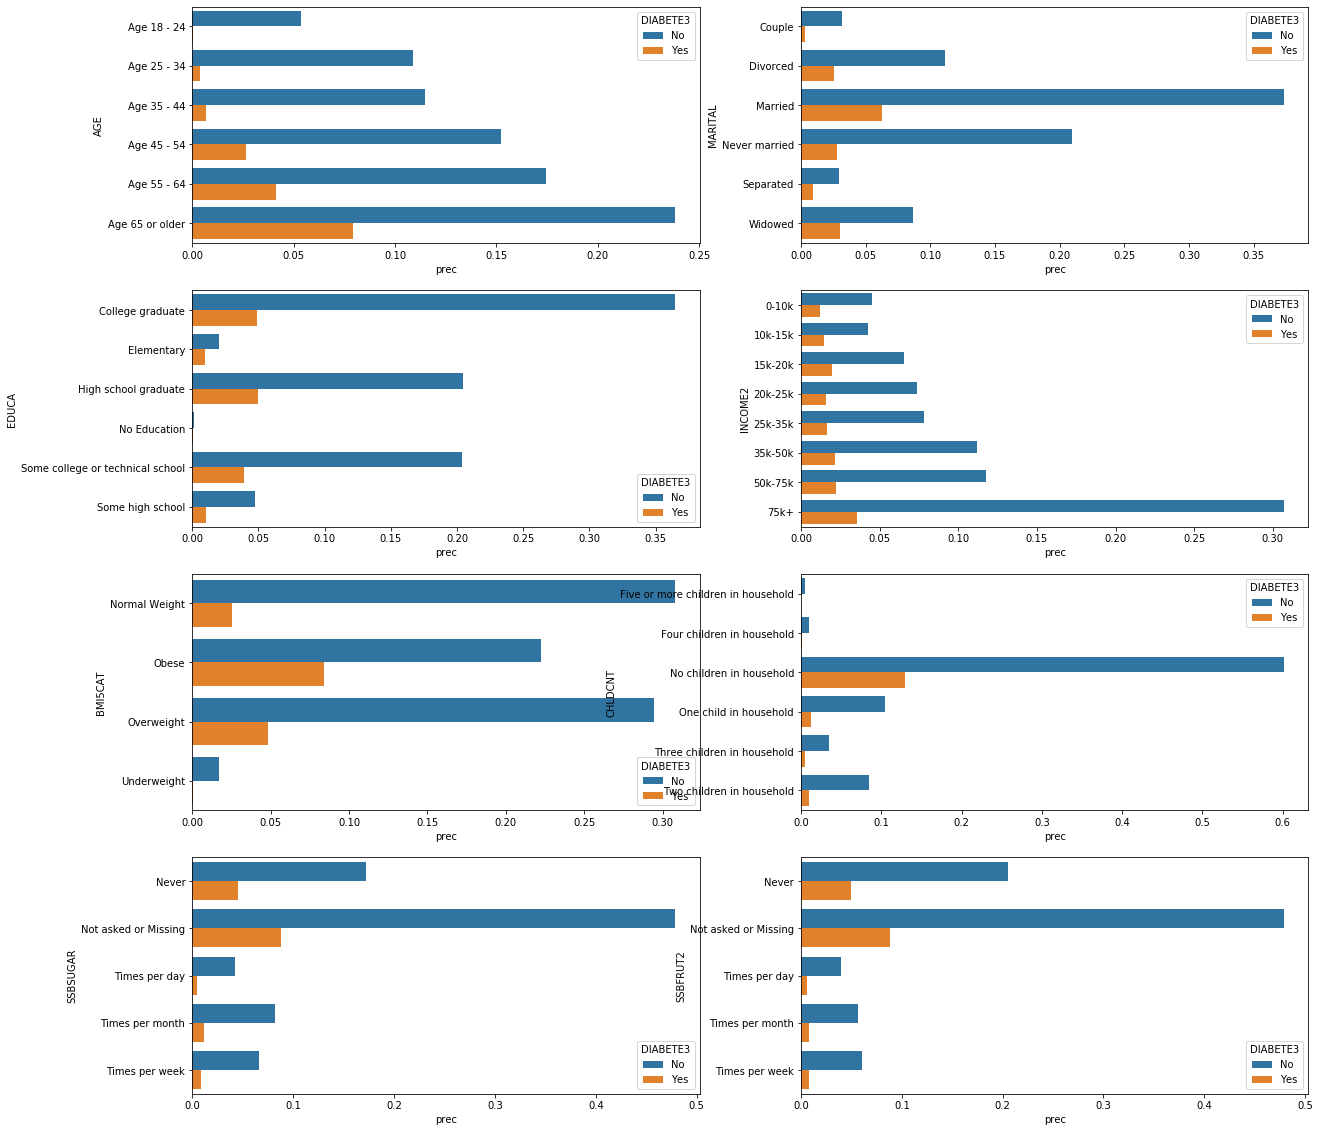

In [374]:
n = data_full.shape[0]
feature_plot = ['AGE', 'MARITAL', 'EDUCA', 'INCOME2', 'BMI5CAT', 'CHLDCNT', 'SSBSUGAR', 'SSBFRUT2']

plt.figure(figsize=(20,20))
for i in range(1, 9):
    plt.subplot(4, 2, i)
    temp = data_full.groupby([feature_plot[i-1], 'DIABETE3']).size().reset_index()
    temp['prec'] = temp[0]/n
    sns.barplot(x='prec', y=feature_plot[i-1], hue='DIABETE3', data=temp)
plt.show()

In [375]:
# n = data_full.shape[0]
# feature_plot = ['AGE', 'MARITAL', 'EDUCA', 'INCOME2', 'BMI5CAT', 'CHLDCNT', 'SSBSUGAR', 'SSBFRUT2']

# plt.figure(figsize=(20,20))
# for i in range(1, 9):
#     plt.subplot(4, 2, i)
#     temp = data_full.groupby([feature_plot[i-1], 'DIABETE3']).size().reset_index()
#     temp['prec'] = temp[0]/n
#     sns.barplot(x='prec', y=feature_plot[i-1], hue='DIABETE3', data=temp)
# plt.show()

## Upsampling

## Feature Engineer

In [377]:
from sklearn.preprocessing import OneHotEncoder

# factorize DIABETES
cat = pd.Categorical(data.DIABETE3, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['DIABETE3'] = labels

# Process GENHLTH
enc = OneHotEncoder(dtype=np.int,sparse=True, handle_unknown='ignore')
GENHLTH = pd.DataFrame(enc.fit_transform(data[['GENHLTH']]).toarray(), columns=enc.get_feature_names())

# Process PHYSHLTH
cat = pd.Categorical(data.PHYSHLTH, categories=['None', 'Number of days'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['PHYSHLTH'] = labels

# Process EXERANY2
cat = pd.Categorical(data.EXERANY2, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['EXERANY2'] = labels

# Process Age
enc = OneHotEncoder(dtype=np.int,sparse=True, handle_unknown='ignore')
AGE = pd.DataFrame(enc.fit_transform(data[['AGE']]).toarray(), columns=enc.get_feature_names())

# Process MARITAL
enc = OneHotEncoder(dtype=np.int,sparse=True, handle_unknown='ignore')
MARITAL = pd.DataFrame(enc.fit_transform(data[['MARITAL']]).toarray(), columns=enc.get_feature_names())

# Process EDUCA
enc = OneHotEncoder(dtype=np.int,sparse=True, handle_unknown='ignore')
EDUCA = pd.DataFrame(enc.fit_transform(data[['EDUCA']]).toarray(), columns=enc.get_feature_names())

# Process INCOME2
enc = OneHotEncoder(dtype=np.int,sparse=True, handle_unknown='ignore')
INCOME2 = pd.DataFrame(enc.fit_transform(data[['INCOME2']]).toarray(), columns=enc.get_feature_names())

# Process SEX
cat = pd.Categorical(data.SEX, categories=['Female', 'Male'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['SEX'] = labels

# Process USEEQUIP
cat = pd.Categorical(data.USEEQUIP, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['USEEQUIP'] = labels

# Process DIFFWALK
cat = pd.Categorical(data.DIFFWALK, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['DIFFWALK'] = labels

# Process BMI5CAT
enc = OneHotEncoder(dtype=np.int,sparse=True, handle_unknown='ignore')
BMI5CAT = pd.DataFrame(enc.fit_transform(data[['BMI5CAT']]).toarray(), columns=enc.get_feature_names())

# Process RFBMI5
cat = pd.Categorical(data.RFBMI5, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['RFBMI5'] = labels

# Process CHLDCNT
enc = OneHotEncoder(dtype=np.int,sparse=True, handle_unknown='ignore')
CHLDCNT = pd.DataFrame(enc.fit_transform(data[['CHLDCNT']]).toarray(), columns=enc.get_feature_names())

# Process DRNKANY5
cat = pd.Categorical(data.DRNKANY5, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['DRNKANY5'] = labels

# Process DRNKDY4
cat = pd.Categorical(data.DRNKDY4, categories=['Did not drink', 'Number of drinks per day'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['DRNKDY4'] = labels

In [425]:
features_binary = ['DIABETE3', 'PHYSHLTH', 'EXERANY2', 'SEX', 'USEEQUIP', 'DIFFWALK', 'RFBMI5', 'DRNKANY5', 'DRNKDY4']

temp1 = data[features_binary].reset_index()
temp2 = pd.concat([GENHLTH,AGE,MARITAL,EDUCA,INCOME2,BMI5CAT,CHLDCNT], axis=1).reset_index()

data_trans = pd.concat([temp1, temp2], axis=1)

In [426]:
data_trans.shape

(4046, 51)

## Upsampling

In [427]:
from sklearn.utils import resample

print('Original Class')
print(data_trans.DIABETE3.value_counts())

# Upsample minority class
data_upsampled = resample(data_trans[data_trans.DIABETE3 == 1], 
                                 replace=True,     # sample with replacement
                                 n_samples=2500,    # to match majority class
                                 random_state=123)

data_full = pd.concat([data_trans, data_upsampled])
print('Sampled Class')
print(data_full.DIABETE3.value_counts())

Original Class
0    3407
1     639
Name: DIABETE3, dtype: int64
Sampled Class
0    3407
1    3139
Name: DIABETE3, dtype: int64


## Machine Learning

In [428]:
from sklearn.model_selection import train_test_split

x = data_full[data_full.columns[~data_full.columns.isin(['DIABETE3'])]]
y = data_full['DIABETE3']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [482]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

def train_cv(model, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):
    
    # Fit a model by providing X and y from training set
    model.fit(x_train, y_train)
    model = model.best_estimator_
    print(model)

    return model

In [483]:
def performance(model):
    # Make prediction on the training data
    y_train_pred = model.predict(x_train)

    # Make predictions on test data
    y_test_pred = model.predict(x_test)
    
    # Evaluate
    Accuracy_Train = accuracy_score(y_train, y_train_pred)
    Accuracy_Test = accuracy_score(y_test, y_test_pred)
    precision_Train = precision_score(y_train, y_train_pred)
    precision_Test = precision_score(y_test, y_test_pred)
    recall_Train = recall_score(y_train, y_train_pred)
    recall_Test = recall_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    confusion = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
    
    # Evaluate table
    metric_names = ['Accuracy','Precision','Recall']
    metric_values_train = [Accuracy_Train, precision_Train, recall_Train]
    metric_values_test = [Accuracy_Test, precision_Test, recall_Test]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},
                               columns=['metrics','train','test']).set_index('metrics')
    
    print('AUC: %.2f' % auc)
    print(all_metrics)
    print(confusion)
    
    # ROC plot
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()   
    
    # Recall vs Precision
#     predicted_proba = model.predict_proba(x_test)
    precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
    
    plt.figure()
    plt.plot(precision, recall, marker='.', label='Random Forest')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend()
    plt.show()

In [484]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

start = time.time()

# Choose the type of classifier. 
rf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [300,500,700], 
              'max_features': ['auto'], 
              'max_depth': [10,15,25], 
              'min_samples_leaf': [20,50],
              'n_jobs':[-1]
             }

# read theory
grid_obj = GridSearchCV(rf, param_grid, cv=3, n_jobs = 8, iid=False, verbose=10, scoring='recall')
model = train_cv(grid_obj)

end = time.time()
print("Time taken by above cell is {}.".format((end-start)/60))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   12.9s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=8)]: Done  45 out of  54 | elapsed:   31.7s remaining:    6.3s
[Parallel(n_jobs=8)]: Done  51 out of  54 | elapsed:   34.3s remaining:    1.9s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   36.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Time taken by above cell is 0.6349342266718546.


AUC: 0.74
              train      test
metrics                      
Accuracy   0.949198  0.732061
Precision  0.943377  0.674797
Recall     0.967731  0.817734
     0    1
0  461  240
1  111  498


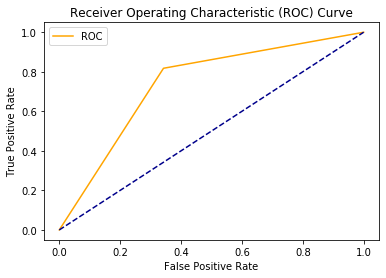

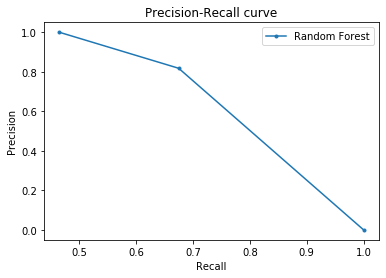

In [486]:
performance(model)

In [469]:
from sklearn.metrics import precision_recall_curve
precision_Test = []
recall_Test = []

threshold = np.linspace(0,1,9)

for i in range(threshold):
    train_proba = model.predict_proba(x_train)
    predicted_proba = model.predict_proba(x_test)
    y_test_pred = (predicted_proba[:,1] >= threshold[i]).astype('int')
    precision_Test = precision_score(y_test, y_test_pred)
    recall_Test = recall_score(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)/len(y_test_pred)
    precision_Test[i], recall_Test[i], _ = precision_recall_curve(y_test, predicted_proba[:,1])

# plot the precision-recall curves
plt.plot(recall_Test, precision_Test, marker='.', label='random forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

TypeError: 'numpy.float64' object does not support item assignment

In [417]:
data_trans.DIABETE3.value_counts()

0    3407
1     639
Name: DIABETE3, dtype: int64

In [186]:
data_full.groupby(['PDIABTST', 'health_status']).size().reset_index().sort_values(0, ascending=False)

,PDIABTST,health_status,0
2,Not asked or Missing,1,3689
1,Not asked or Missing,0,2012
3,Yes,0,1036
0,No,0,602


In [187]:
survey.groupby(['PDIABTST', 'DIABETE3']).size().reset_index().sort_values(0, ascending=False)

,PDIABTST,DIABETE3,0
6,Not asked or Missing,No,3101
13,Yes,No,1647
2,No,No,980
9,Not asked or Missing,Yes,842
0,Don't know/Not Sure,No,116
7,Not asked or Missing,No pre-diabetes or borderline diabetes,70
14,Yes,No pre-diabetes or borderline diabetes,39
10,Not asked or Missing,Yes but female told only during pregnancy,26
16,Yes,Yes but female told only during pregnancy,18
4,No,Yes but female told only during pregnancy,7


In [223]:
survey.RFBMI5.value_counts()

Yes                           3867
No                            2458
Don't know/Refused/Missing     540
Name: RFBMI5, dtype: int64